In [1]:
!pip install wordcloud
!pip install nltk
!pip install pandas
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline


[nltk_data] Downloading package punkt to /home/sachin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
tweets = pd.read_csv('sentiment_tweets3.csv')
tweets.head(20)

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,624,so sleepy. good times tonight though,0
6,701,"@SilkCharm re: #nbn as someone already said, d...",0
7,808,23 or 24ï¿½C possible today. Nice,0
8,1193,nite twitterville workout in the am -ciao,0
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0


In [3]:
tweets['label (depression result)'].value_counts()

0    8000
1    2314
Name: label (depression result), dtype: int64

In [4]:
tweets['label (depression result)'].value_counts()

0    8000
1    2314
Name: label (depression result), dtype: int64

In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [6]:
totalTweets = 8000 + 2314
trainIndex, testIndex = list(), list()
for i in range(tweets.shape[0]):
    if np.random.uniform(0, 1) < 0.98:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = tweets.iloc[trainIndex]
testData = tweets.iloc[testIndex]

In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [8]:
trainData['label (depression result)'].value_counts()

0    7821
1    2259
Name: label (depression result), dtype: int64

In [9]:
trainData.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [10]:
testData.head()

,Index,message to examine,label (depression result)
6,701,"@SilkCharm re: #nbn as someone already said, d...",0
11,1368,Finally! I just created my WordPress Blog. The...,0
143,16152,@azcameron serious business,0
160,18425,@ddlovato oh demi. that sure was a knee slapper.,0
253,27794,@KnightTim I love you too,0


In [11]:
import matplotlib.font_manager as fm

# Get the list of installed TrueType fonts
fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# Print the font names and their file paths
for font in fonts:
    print(font)


/usr/share/fonts/opentype/urw-base35/NimbusRoman-Bold.otf
/usr/share/fonts/truetype/malayalam/Suruma.ttf
/usr/share/fonts/truetype/malayalam/RaghuMalayalamSans-Regular.ttf
/usr/share/fonts/truetype/malayalam/Dyuthi-Regular.ttf
/usr/share/fonts/truetype/malayalam/Rachana-Regular.ttf
/usr/share/fonts/truetype/tlwg/TlwgTypewriter-Bold.ttf
/usr/share/fonts/truetype/fonts-beng-extra/Ani.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf
/usr/share/fonts/truetype/malayalam/Karumbi-Regular.ttf
/usr/share/fonts/truetype/teluguvijayam/SreeKrushnadevaraya.ttf
/usr/share/fonts/truetype/liberation2/LiberationSans-Bold.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-Bold.ttf
/usr/share/fonts/truetype/tlwg/Kinnari-Bold.ttf
/usr/share/fonts/truetype/liberation2/LiberationSerif-Regular.ttf
/usr/share/fonts/truetype/open-sans/OpenSans-CondLightItalic.ttf
/usr/share/fonts/truetype/tlwg/TlwgMono.ttf
/usr/share/fonts/truetype/freefont/FreeSansBold.ttf
/usr/share/fonts/truetype/fonts-yrsa-r

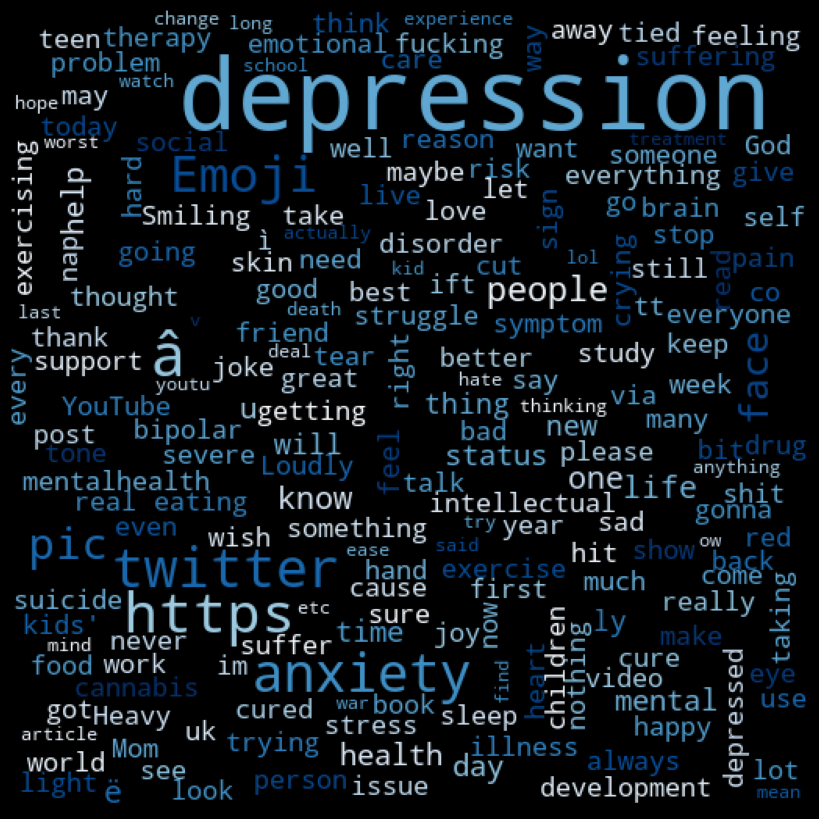

In [12]:
depressive_words = ' '.join(list(tweets[tweets['label (depression result)'] == 1]['message to examine']))
depressive_wc = WordCloud(width=512, height=512, collocations=False, colormap='Blues').generate(depressive_words)

plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

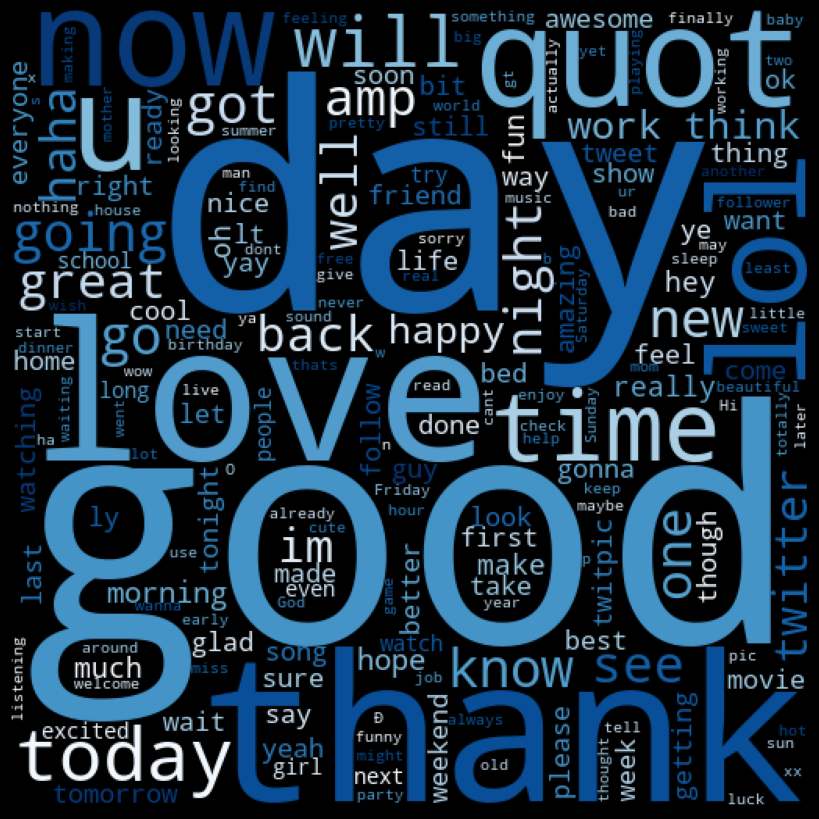

In [13]:
positive_words = ' '.join(list(tweets[tweets['label (depression result)'] == 0]['message to examine']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

In [14]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [15]:
class TweetClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.tweets, self.labels = trainData['message to examine'], trainData['label (depression result)']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word] + 1) / (self.depressive_words + \
                                                                len(list(self.tf_depressive.keys())))
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word] + 1) / (self.positive_words + \
                                                                len(list(self.tf_positive.keys())))
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 


    def calc_TF_and_IDF(self):
        noOfMessages = self.tweets.shape[0]
        self.depressive_tweets, self.positive_tweets = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_tweets = self.depressive_tweets + self.positive_tweets
        self.depressive_words = 0
        self.positive_words = 0
        self.tf_depressive = dict()
        self.tf_positive = dict()
        self.idf_depressive = dict()
        self.idf_positive = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.tweets.iloc[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels.iloc[i]:
                    self.tf_depressive[word] = self.tf_depressive.get(word, 0) + 1
                    self.depressive_words += 1
                else:
                    self.tf_positive[word] = self.tf_positive.get(word, 0) + 1
                    self.positive_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels.iloc[i]:
                    self.idf_depressive[word] = self.idf_depressive.get(word, 0) + 1
                else:
                    self.idf_positive[word] = self.idf_positive.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_depressive = dict()
        self.prob_positive = dict()
        self.sum_tf_idf_depressive = 0
        self.sum_tf_idf_positive = 0
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.tf_depressive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive[word] + self.idf_positive.get(word, 0)))
            self.sum_tf_idf_depressive += self.prob_depressive[word]
        for word in self.tf_depressive:
            self.prob_depressive[word] = (self.prob_depressive[word] + 1) / (self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
            
        for word in self.tf_positive:
            self.prob_positive[word] = (self.tf_positive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive.get(word, 0) + self.idf_positive[word]))
            self.sum_tf_idf_positive += self.prob_positive[word]
        for word in self.tf_positive:
            self.prob_positive[word] = (self.prob_positive[word] + 1) / (self.sum_tf_idf_positive + len(list(self.prob_positive.keys())))
            
    
        self.prob_depressive_tweet, self.prob_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets 
                    
    def classify(self, processed_message):
        pDepressive, pPositive = 0, 0
        for word in processed_message:                
            if word in self.prob_depressive:
                pDepressive += log(self.prob_depressive[word])
            else:
                if self.method == 'tf-idf':
                    pDepressive -= log(self.sum_tf_idf_depressive + len(list(self.prob_depressive.keys())))
                else:
                    pDepressive -= log(self.depressive_words + len(list(self.prob_depressive.keys())))
            if word in self.prob_positive:
                pPositive += log(self.prob_positive[word])
            else:
                if self.method == 'tf-idf':
                    pPositive -= log(self.sum_tf_idf_positive + len(list(self.prob_positive.keys()))) 
                else:
                    pPositive -= log(self.positive_words + len(list(self.prob_positive.keys())))
            pDepressive += log(self.prob_depressive_tweet)
            pPositive += log(self.prob_positive_tweet)
        return pDepressive >= pPositive
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [16]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels.iloc[i] == 1 and predictions[i] == 1)
        true_neg += int(labels.iloc[i] == 0 and predictions[i] == 0)
        false_pos += int(labels.iloc[i] == 0 and predictions[i] == 1)
        false_neg += int(labels.iloc[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [17]:
sc_tf_idf = TweetClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message to examine'])
metrics(testData['label (depression result)'], preds_tf_idf)

Precision:  0.9393939393939394
Recall:  0.5636363636363636
F-score:  0.7045454545454546
Accuracy:  0.8888888888888888


In [19]:
sc_bow = TweetClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message to examine'])
metrics(testData['label (depression result)'], preds_bow)

Precision:  1.0
Recall:  0.3090909090909091
F-score:  0.4722222222222222
Accuracy:  0.8376068376068376


In [20]:
pm = process_message('Lately I have been feeling unsure of myself as a person & an artist')
sc_tf_idf.classify(pm)

True

In [21]:
pm = process_message('Extreme sadness, lack of energy, hopelessness')
sc_tf_idf.classify(pm)

True

In [22]:
pm = process_message('Hi hello depression and anxiety are the worst')
sc_tf_idf.classify(pm)

True

In [23]:
pm = process_message('I am officially done with @kanyewest')
sc_tf_idf.classify(pm)

True

In [24]:
pm = process_message('Feeling down...')
sc_tf_idf.classify(pm)

True

In [25]:
pm = process_message('My depression will not let me work out')
sc_tf_idf.classify(pm)

True

In [26]:
pm = process_message('Loving how me and my lovely partner is talking about what we want.')
sc_tf_idf.classify(pm)

False

In [27]:
pip install tk

  Using cached tk-0.1.0-py3-none-any.whl (3.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [33]:
# import tkinter as tk
# from tkinter import simpledialog, messagebox

# # Function to handle the button click event
# def show_output():
#     user_input = entry.get()
#     pm = process_message(user_input)
    
#       # Get the input from the entry widget
#     if not sc_tf_idf.classify(pm):
#         txt = "Positive"
#     else:
#         txt="Negative"
#     output_label.config(text="User input: " + txt)  # Update the label with the output

# # Create the Tkinter root window
# root = tk.Tk()

# # Create an entry widget for input
# entry = tk.Entry(root)
# entry.pack()

# # Create a button to trigger the output display
# button = tk.Button(root, text="Show Output", command=show_output)
# button.pack()

# # Create a label to display the output
# output_label = tk.Label(root)
# output_label.pack()

# # Run the Tkinter event loop
# root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import simpledialog, messagebox
# Import the necessary modules for sc_tf_idf and process_message

# Function to handle the button click event
def show_output():
    user_input = entry.get()
    pm = process_message(user_input)
    
    if not sc_tf_idf.classify(pm):
        txt = "Positive"
    else:
        txt = "Negative"
    output_label.config(text="User input: " + txt)  # Update the label with the output

# Create the Tkinter root window
root = tk.Tk()
root.title("Sentiment Analysis")
root.geometry("400x200")  # Set the window size

# Create a frame to hold the widgets
frame = tk.Frame(root, padx=20, pady=20)
frame.pack()

# Create a label and entry widget for input
label = tk.Label(frame, text="Enter your text:")
label.pack()
entry = tk.Entry(frame, width=200, bg="pink")  # Set the background color of the entry widget
entry.pack()

# Create a button to trigger the output display
button = tk.Button(frame, text="Show Output", command=show_output)
button.pack()

# Create a label to display the output
output_label = tk.Label(frame, text="User input:")
output_label.pack()

# Customize the appearance of the widgets
root.configure(bg="#F0F0F0")  # Set the background color of the window
frame.configure(bg="#F0F0F0")
label.configure(font=("Arial", 12), fg="#333333", bg="#F0F0F0")
entry.configure(font=("Arial", 12), fg="#333333")
button.configure(font=("Arial", 12), fg="white", bg="#007BFF", activebackground="#0056B3")
output_label.configure(font=("Arial", 12), fg="#333333", bg="#F0F0F0")

# Run the Tkinter event loop
root.mainloop()
